### This python notebook display the modulus image after taking the complex sum across the image frames for each of the MR Fingerprinting reconstructions stored as a MATLAB .mat file

Necessary imports

In [1]:
import numpy as np
import scipy.io as sio
import scipy.misc
import matplotlib.pyplot as plt
import glob
import os

Set path to parent folder of MATLAB .mat files containing the complex images of interest

In [2]:
parent_folder = '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input'
mat_file_list = glob.glob(parent_folder + '/*_images.mat')

In [3]:
mat_file_list

['/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_1000_TE3.3_FSC_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_1000_TE3.3_US_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_1000_TE5.0_FSC_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_1000_TE5.0_US_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_210_TE3.3_US_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_210_TE4.0_US_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_500_TE3.3_FSC_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_500_TE3.3_US_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_500_TE5.2_FSC_images.mat',
 '/git/bitbucket.org/Hamburg_MRF_workshop_VUMC_results/data_input/VUMC_MRF_500_TE5.

Loop over .mat files and plot magnitude of complex sum across all fingerprinting frames

Saved magnitude_of_complex_sum_VUMC_MRF_1000_TE3.3_FSC.png


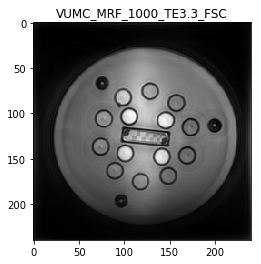

Saved magnitude_of_complex_sum_VUMC_MRF_1000_TE3.3_US.png


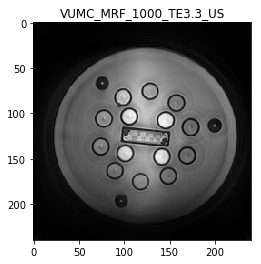

Saved magnitude_of_complex_sum_VUMC_MRF_1000_TE5.0_FSC.png


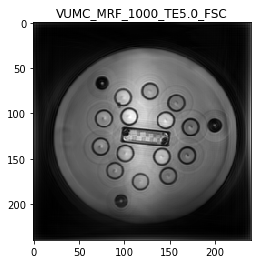

Saved magnitude_of_complex_sum_VUMC_MRF_1000_TE5.0_US.png


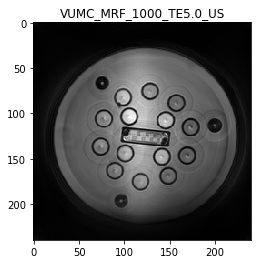

Saved magnitude_of_complex_sum_VUMC_MRF_210_TE3.3_US.png


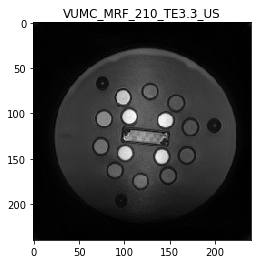

Saved magnitude_of_complex_sum_VUMC_MRF_210_TE4.0_US.png


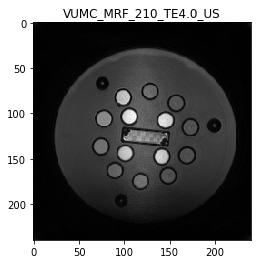

Saved magnitude_of_complex_sum_VUMC_MRF_500_TE3.3_FSC.png


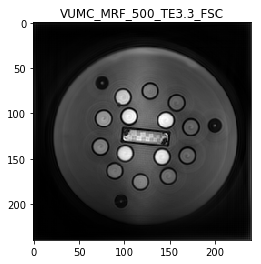

Saved magnitude_of_complex_sum_VUMC_MRF_500_TE3.3_US.png


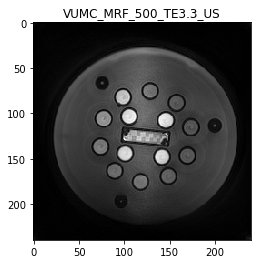

Saved magnitude_of_complex_sum_VUMC_MRF_500_TE5.2_FSC.png


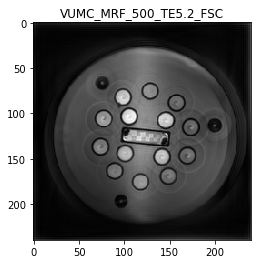

Saved magnitude_of_complex_sum_VUMC_MRF_500_TE5.2_US.png


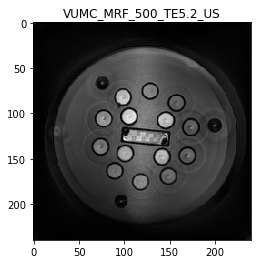

In [4]:
for idx_file in range(len(mat_file_list)):
    
    this_filename = os.path.basename(mat_file_list[idx_file])
    this_filename_prefix = this_filename[:-11]
    
    # Load .mat file
    mat_contents = sio.loadmat(mat_file_list[idx_file])
    
    # Extract stack of complex images
    imgs_complex = mat_contents['imgs']
    
    # Sum across third axis
    img_sum_complex = np.sum(imgs_complex, axis=2)
    
    # Calculate magnitude (modulus) image
    # flip up-down and rotate 90 degrees to match orientation of Hamburg reconstructions
    img_sum_modulus = np.rot90( np.flipud( np.absolute(img_sum_complex) ), +1)
    
    # save image to PNG file
    this_filename_png = 'magnitude_of_complex_sum_' + this_filename_prefix + '.png'
    scipy.misc.imsave(this_filename_png, img_sum_modulus)
    print 'Saved ' + this_filename_png
    
    # Display image
    plt.imshow(img_sum_modulus, cmap='gray')
    plt.title(this_filename_prefix)
    plt.show()